#### Q2) Use python urllib library to extract the KDD Cup 99 data from their web repository, store it in a temporary location and then move it to the Databricks filesystem which can enable easy access to this data for analysis.

In [0]:
import urllib.request
from pyspark.sql.functions import *
urllib.request.urlretrieve("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz", "/tmp/kddcup_data.gz")
dbutils.fs.mv("file:/tmp/kddcup_data.gz", "dbfs:/kdd/kddcup_data.gz")
display(dbutils.fs.ls("dbfs:/kdd"))

path,name,size,modificationTime
dbfs:/kdd/kddcup_data.gz,kddcup_data.gz,2144903,1656474512000


#### Q3)After storing the data into the Databricks filesystem. Load your data from the disk into Spark's RDD. Print 10 values of your RDD and verify the type of data structure of your data (RDD).

In [0]:
rdd=spark.sparkContext.textFile('dbfs:/kdd')
rdd.take(10)

Out[16]: ['0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1

In [0]:
print('The type of data structure of data is', type(rdd))

The type of data structure of data is <class 'pyspark.rdd.RDD'>


#### Q4) Split the data. (Each entry in your RDD is a comma-separated line of data, which you first need to split before you can parse and build your dataframe.) Show the total number of features (columns) and print results.

In [0]:
split_rdd = rdd.map(lambda x: x.split(","))
print('The total number of features are',len(split_rdd.take(1)[0]))

The total number of features are 42


In [0]:
print(split_rdd.take(5))

[['0', 'tcp', 'http', 'SF', '181', '5450', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '9', '9', '1.00', '0.00', '0.11', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.'], ['0', 'tcp', 'http', 'SF', '239', '486', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '19', '19', '1.00', '0.00', '0.05', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.'], ['0', 'tcp', 'http', 'SF', '235', '1337', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '29', '29', '1.00', '0.00', '0.03', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.'], ['0', 'tcp', 'http', 'SF', '219', '1337', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '6', '6', '0.00', '0.00', '0.00', '0.00', '1.00', '0

#### Q5) Now extract these 6 columns (duration, protocol_type, service, src_bytes, dst_bytes, flag and label) from your dataset. Build a new RDD and dataframe. Print schema and display 10 values.

In [0]:
from pyspark.sql import Row
rdd2=split_rdd.map(lambda row: Row(duration=int(row[0]),\
                                  protocol_type=row[1],\
                                  service=row[2],\
                                  flag=row[3],\
                                  src_bytes=int(row[4]),\
                                  dst_bytes=int(row[5]),\
                                  label=row[-1]))
rdd2.take(10)

Out[20]: [Row(duration=0, protocol_type='tcp', service='http', flag='SF', src_bytes=181, dst_bytes=5450, label='normal.'),
 Row(duration=0, protocol_type='tcp', service='http', flag='SF', src_bytes=239, dst_bytes=486, label='normal.'),
 Row(duration=0, protocol_type='tcp', service='http', flag='SF', src_bytes=235, dst_bytes=1337, label='normal.'),
 Row(duration=0, protocol_type='tcp', service='http', flag='SF', src_bytes=219, dst_bytes=1337, label='normal.'),
 Row(duration=0, protocol_type='tcp', service='http', flag='SF', src_bytes=217, dst_bytes=2032, label='normal.'),
 Row(duration=0, protocol_type='tcp', service='http', flag='SF', src_bytes=217, dst_bytes=2032, label='normal.'),
 Row(duration=0, protocol_type='tcp', service='http', flag='SF', src_bytes=212, dst_bytes=1940, label='normal.'),
 Row(duration=0, protocol_type='tcp', service='http', flag='SF', src_bytes=159, dst_bytes=4087, label='normal.'),
 Row(duration=0, protocol_type='tcp', service='http', flag='SF', src_bytes=210, 

In [0]:
#Making a new df
df=sqlContext.createDataFrame(rdd2)

#Printing the schema of df
print('The schema of the df is:')
df.printSchema()

The schema of the df is:
root
 |-- duration: long (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- src_bytes: long (nullable = true)
 |-- dst_bytes: long (nullable = true)
 |-- label: string (nullable = true)



In [0]:
#Displaying top 10 values of df
df.show(10)

+--------+-------------+-------+----+---------+---------+-------+
|duration|protocol_type|service|flag|src_bytes|dst_bytes|  label|
+--------+-------------+-------+----+---------+---------+-------+
|       0|          tcp|   http|  SF|      181|     5450|normal.|
|       0|          tcp|   http|  SF|      239|      486|normal.|
|       0|          tcp|   http|  SF|      235|     1337|normal.|
|       0|          tcp|   http|  SF|      219|     1337|normal.|
|       0|          tcp|   http|  SF|      217|     2032|normal.|
|       0|          tcp|   http|  SF|      217|     2032|normal.|
|       0|          tcp|   http|  SF|      212|     1940|normal.|
|       0|          tcp|   http|  SF|      159|     4087|normal.|
|       0|          tcp|   http|  SF|      210|      151|normal.|
|       0|          tcp|   http|  SF|      212|      786|normal.|
+--------+-------------+-------+----+---------+---------+-------+
only showing top 10 rows



#### Q6) Get the total number of connections based on the protocol_type and based on the service. Show result in an ascending order. Plot the bar graph for both.

In [0]:
df_protocoltype=df.groupBy('protocol_type').count().orderBy('count')
print('Total connections based on protocol type')
display(df_protocoltype)

Total connections based on protocol type


protocol_type,count
udp,20354
tcp,190065
icmp,283602


In [0]:
display(df_protocoltype)

protocol_type,count
udp,20354
tcp,190065
icmp,283602


In [0]:
df_service=df.groupBy('service').count().orderBy('count')
print('Total connections based on service')
df_service.show(truncate=False)

Total connections based on service
+-----------+-----+
|service    |count|
+-----------+-----+
|red_i      |1    |
|pm_dump    |1    |
|tftp_u     |1    |
|tim_i      |7    |
|X11        |11   |
|urh_i      |14   |
|IRC        |43   |
|Z39_50     |92   |
|netstat    |95   |
|ctf        |97   |
|kshell     |98   |
|name       |98   |
|netbios_dgm|99   |
|http_443   |99   |
|exec       |99   |
|ldap       |101  |
|pop_2      |101  |
|link       |102  |
|netbios_ns |102  |
|daytime    |103  |
+-----------+-----+
only showing top 20 rows



In [0]:
display(df_service)

service,count
tftp_u,1
red_i,1
pm_dump,1
tim_i,7
X11,11
urh_i,14
IRC,43
Z39_50,92
netstat,95
ctf,97


**The above graph is made again using matplotlib as pyspark's graph does not display all the x labels.**

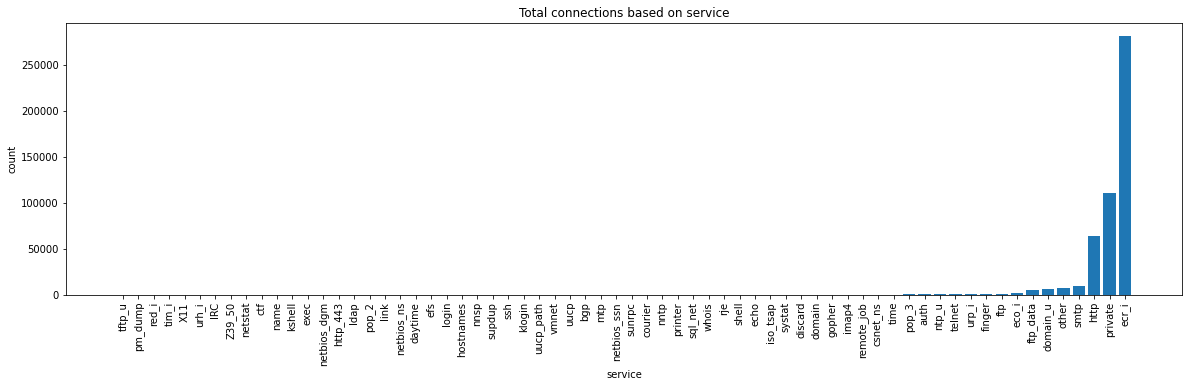

In [0]:
import matplotlib.pyplot as plt
df_service=df.groupBy('service').count().orderBy('count').toPandas()
plt.figure(figsize=(20,5))
plt.bar(df_service['service'], df_service['count'])
plt.xticks(rotation=90)
plt.title('Total connections based on service')
plt.xlabel('service')
plt.ylabel('count')
plt.show()

#### Q7) Do a further exploratory data analysis, including other columns of this dataset and plot graphs. Plot at least 3 different charts and explain them.

In [0]:
display(df.groupBy("label").count().orderBy('count'))

label,count
spy.,2
perl.,3
phf.,4
multihop.,7
ftp_write.,8
loadmodule.,9
rootkit.,10
imap.,12
warezmaster.,20
land.,21


**The pie chart above shows the distribution of the attacks(intrusions) in the connection. It can be observed that just 20% of the connections are normal while 80% of them are attacks with the most common being 'smurf' at 57% followed by 'neptune' at 22%. The remaining intrusion types just form 1% of the labels**

In [0]:
df_2=df.withColumn('label',when(df.label=='normal.','normal').otherwise('attack'))
df_attack2=df_2.groupBy('label').agg(mean("duration").alias('avg_duration')).\
        orderBy('avg_duration',ascending=False)
display(df_attack2)

label,avg_duration
normal,216.65732231336992
attack,6.620890601724542


**The above bar plot shows the average duration(length) of the connection for normal and attack labels. In general, normal connections are longer at above 200 seconds, while attacks often last for a short time like 0-5 seconds. A short connection can be strong indicator for an anomaly and can help detecting attacks.**

##### Now let's explore how long these attacks last for different services using another bar plot:

In [0]:
#Get all the data for attacks
df_attack=df_2.filter(df_2.label=='attack')

#Group the data by services and calculate average duration for each
df_attack2=df_attack.groupBy('service').\
        agg(mean("duration").alias('avg_attack_duration')).\
        orderBy('avg_attack_duration',ascending=False)

#Filter the data where duration is greater than 1 second
df_attack3=df_attack2.filter(df_attack2.avg_attack_duration>=1)

display(df_attack3)

service,avg_attack_duration
ftp,769.915294117647
supdup,387.48571428571427
ftp_data,355.81581798483205
pop_3,328.0
csnet_ns,321.04761904761904
efs,299.36893203883494
uucp,286.9622641509434
printer,283.8073394495413
courier,283.50925925925924
other,180.8704049844237


In [0]:
display(df_attack.groupBy('service').count().orderBy('count',ascending=False).take(5))

service,count
ecr_i,281055
private,103527
http,2407
other,1605
eco_i,1253


**The bar plot shows the average duration of attack for different services. fttp has the highest duration of 700+ seconds while 8 other attacks (supdup, fttp_data, pop_3, csnet_ns, efs, uucp, printer, courier, other)have range of 150-400 seconds. All other attacks have a very short duration of less than 10 seconds. The second bar plot shows the most common services under attacks. ecr_i and private account for the majority (100k+ attacks) and have a very short duration as they are not present in the above plot with duration of greater than 1 second. So these 2 majority services have a duration of less than 1 second for attacks.**

In [0]:
display(df_2.select('dst_bytes','label')) 

dst_bytes,label
5450,normal
486,normal
1337,normal
1337,normal
2032,normal
2032,normal
1940,normal
4087,normal
151,normal
786,normal


**The above boxplots show distribution of the number of data bytes from destination to source for normal connections and attacks. It can be seen that dst_bytes are generally similar(2.8k-2.9k) in case of attacks whereas for normal, they have more variation.**

In [0]:
print('Distribution of of data bytes from source to destination for normal connections')
display(df_2.filter(df_2.label=='normal').select('src_bytes'))
print('Distribution of of data bytes from source to destination for attacks')
display(df_2.filter(df_2.label=='attack').select('src_bytes')) 

Distribution of of data bytes from source to destination for normal connections


src_bytes
181
239
235
219
217
217
212
159
210
212


Distribution of of data bytes from source to destination for attacks


src_bytes
1511
1735
281
269
0
0
1032
1032
1032
1032


**The above histograms shows the distribution of data bytes from source to destination for normal connections and attacks. It can be inferred that number is generally very high in hundreds of millions for attacks whereas for normal connections, it is usually less than 100k. Thus number of source bytes can be a strong indicator for anomalies.**

In [0]:
print('Count of attacks and normal connections for different flags')
display(df_2.groupBy('label','flag').count().orderBy('count',ascending=False).take(6))

Count of attacks and normal connections for different flags


label,flag,count
attack,SF,286731
normal,SF,91709
attack,S0,86956
attack,REJ,21534
normal,REJ,5341
attack,RSTR,872


In [0]:
print('The flag S0 accounts for', (df_attack.filter(df_attack.flag=='S0').count()/\
                                   df_attack.count())*100, '% of the attacks')
print('The flag S0 accounts for', (df_2.filter(df_2.flag=='S0').filter(df_2.label=='normal').count()/\
                                   df_2.filter(df_2.label=='normal').count())*100, '% of the normal labels')

The flag S0 accounts for 21.91746294200528 % of the attacks
The flag S0 accounts for 0.05242706470116573 % of the normal labels


##### The above line chart shows that flags 'SF','S0' and 'REJ' are the most commonly occurring for attacks. A key observation is that Flag S0 accounts for more than 20% of the attacks whereas it accounts for only 0.05% of the normal labels. Thus, flag S0 is a strong indicator of attacks.

#### Q8)Look at the label column where label == ‘normal’. Now create a new label column where you have a label == ‘normal’ and everything else is considered as an ‘attack’. Split your data (train/test) and based on your new label column now build a simple machine learning model for intrusion detection (you can use few selected columns for your model out of all). Explain which algorithm you have selected and why? Show the results with some success metrics.

In [0]:
from pyspark.ml.feature import Imputer, StringIndexer, VectorAssembler, StandardScaler, OneHotEncoder
from pyspark.ml.linalg import SparseVector, DenseVector
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression

In [0]:
#create two labels: normal and attack
df2=df.withColumn('label',when(df.label=='normal.','normal').otherwise('attack'))

In [0]:
#Specify categorical and numerical columns for further indexing
cat_cols = ['protocol_type','service','flag','label']
num_cols = [ 'duration', 'src_bytes','dst_bytes']

#Use string indexer on the categorical columns
str_indexer=StringIndexer(inputCols=cat_cols,outputCols=['protocol_type_idx','service_idx','flag_idx','label_idx'])
cat_df=str_indexer.fit(df2).transform(df2)
cat_df=cat_df.select('duration', 'src_bytes','dst_bytes','protocol_type_idx','service_idx','flag_idx','label_idx')
cat_df.show(5,truncate=False)

+--------+---------+---------+-----------------+-----------+--------+---------+
|duration|src_bytes|dst_bytes|protocol_type_idx|service_idx|flag_idx|label_idx|
+--------+---------+---------+-----------------+-----------+--------+---------+
|0       |181      |5450     |1.0              |2.0        |0.0     |1.0      |
|0       |239      |486      |1.0              |2.0        |0.0     |1.0      |
|0       |235      |1337     |1.0              |2.0        |0.0     |1.0      |
|0       |219      |1337     |1.0              |2.0        |0.0     |1.0      |
|0       |217      |2032     |1.0              |2.0        |0.0     |1.0      |
+--------+---------+---------+-----------------+-----------+--------+---------+
only showing top 5 rows



In [0]:
#Use One Hot encoder on all categorical columns except label(which is the target):
ohe=OneHotEncoder(inputCols=['protocol_type_idx','service_idx','flag_idx'],outputCols=['protocol_type_oh','service_oh','flag_oh'])
df_ohe=ohe.fit(cat_df).transform(cat_df)
df_ohe=df_ohe.select('duration', 'src_bytes','dst_bytes','protocol_type_oh','service_oh','flag_oh','label_idx')
df_ohe.show(5,truncate=False)

+--------+---------+---------+----------------+--------------+--------------+---------+
|duration|src_bytes|dst_bytes|protocol_type_oh|service_oh    |flag_oh       |label_idx|
+--------+---------+---------+----------------+--------------+--------------+---------+
|0       |181      |5450     |(2,[1],[1.0])   |(65,[2],[1.0])|(10,[0],[1.0])|1.0      |
|0       |239      |486      |(2,[1],[1.0])   |(65,[2],[1.0])|(10,[0],[1.0])|1.0      |
|0       |235      |1337     |(2,[1],[1.0])   |(65,[2],[1.0])|(10,[0],[1.0])|1.0      |
|0       |219      |1337     |(2,[1],[1.0])   |(65,[2],[1.0])|(10,[0],[1.0])|1.0      |
|0       |217      |2032     |(2,[1],[1.0])   |(65,[2],[1.0])|(10,[0],[1.0])|1.0      |
+--------+---------+---------+----------------+--------------+--------------+---------+
only showing top 5 rows



In [0]:
#Use Vector assembler to combine all one hot encoded categorical features and numerical features:
final_assembler=VectorAssembler(inputCols=['protocol_type_oh','service_oh','flag_oh','duration', 'src_bytes','dst_bytes'],outputCol='features')
df_all=final_assembler.transform(df_ohe)
df_final=df_all.select('features','label_idx')
df_final.show(5,truncate=False)

+----------------------------------------------+---------+
|features                                      |label_idx|
+----------------------------------------------+---------+
|(80,[1,4,67,78,79],[1.0,1.0,1.0,181.0,5450.0])|1.0      |
|(80,[1,4,67,78,79],[1.0,1.0,1.0,239.0,486.0]) |1.0      |
|(80,[1,4,67,78,79],[1.0,1.0,1.0,235.0,1337.0])|1.0      |
|(80,[1,4,67,78,79],[1.0,1.0,1.0,219.0,1337.0])|1.0      |
|(80,[1,4,67,78,79],[1.0,1.0,1.0,217.0,2032.0])|1.0      |
+----------------------------------------------+---------+
only showing top 5 rows



In [0]:
#Splitting the data to fit the model
train_data, test_data = df_final.randomSplit([.7,.3],seed=1628)

**Next, we fit the logistic regression model on standardized features. Note: logistic regression in pyspark has a built-in hyperparameter standardization which is set to True as default.**

In [0]:
# Initialise LogisticRegression model
lr = LogisticRegression(labelCol= 'label_idx', featuresCol="features", standardization=True, maxIter=10)

# Train model with Training Data
model = lr.fit(train_data)

#Get train and test predictions
pred_train = model.transform(train_data)
pred_test = model.transform(test_data)

In [0]:
#Evaluation Metrics
#Area under ROC curve
auc_evaluator = BinaryClassificationEvaluator(rawPredictionCol="prediction", \
                                              labelCol='label_idx')

AUC_test = auc_evaluator.evaluate(pred_test)
AUC_train = auc_evaluator.evaluate(pred_train)
print("areaUnderROC for test =" , AUC_test,\
     'for train=',AUC_train)

#Area under the Precision Recall curve
aupr_evaluator = BinaryClassificationEvaluator(rawPredictionCol="prediction",\
                                               labelCol='label_idx',metricName='areaUnderPR')

AUPR_test= aupr_evaluator.evaluate(pred_test)
AUPR_train= aupr_evaluator.evaluate(pred_train)
print("Area Under precision-recall curve for test=", AUPR_test,\
      'for train=',AUPR_train)

#Test and train accuracies
acc_evaluator= MulticlassClassificationEvaluator(predictionCol="prediction",\
                                                 labelCol='label_idx',metricName='accuracy')
print("Test Accuracy of the model = ", (acc_evaluator.evaluate(pred_test))*100,"%",\
     "Train Accuracy of the model = ", (acc_evaluator.evaluate(pred_train))*100,"%")

#Test and train f1 scores
f1_evaluator= MulticlassClassificationEvaluator(predictionCol="prediction",\
                                                labelCol='label_idx',metricName='f1')
print("Test f1 of the model = ", f1_evaluator.evaluate(pred_test),\
     "Train f1 of the model = ", f1_evaluator.evaluate(pred_train))

areaUnderROC for test = 0.9898741577249213 for train= 0.9895742306205022
Area Under precision-recall curve for test= 0.9531016702913927 for train= 0.9526059867765035
Test Accuracy of the model =  98.9301302656065 % Train Accuracy of the model =  98.91839905731763 %
Test f1 of the model =  0.9893716708557854 Train f1 of the model =  0.9892546027393091


##### Logistic regression has been selected to implement on kdd dataset with Area Under the curve, Area under the precision-recall curve, Accuracy, F1 scores as metrics. 

##### Justification: 

- Since we have a simple structured data which is linearly spearable, logistic regression is a better choice. Another model presented in the research paper is SVM which is a more complex model and is generally used for unstructured or image data.

- It is generally advisable to try out the simpler models first. If logistic would have failed, we could try SVM. However, in this case, logistic model gives a very high AUC of 0.99 and hence, we stick to it.

- Moreover, logistic regression gives a probability distribution for different classes which in our case, will help dteermine the probability of an attack.

- Since our dataset has a large number of features(42), the coefficients obtained from logisic model will help deduce which features are important for classification.

- The high accuracy obtained clearly signifies that logistic is a good fit on the data.

#### Results of logistic regression model:

- AUC- Test: 0.99, Train: 0.99
- AUPR- Test: 0.95, Train: 0.95
- Accuracy- Test: 98.9%, Train: 98.9%
- F1- Test: 0.99, Train: 0.99

##### From the metrics above, it can be said that the model has performed well on unseen data and does not overfit or underfit as the metrics score for both test and train sets are similar. It can detect intrusions in the connection with 98.9% accuracy.